In [177]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score 

In [178]:
df = pd.read_csv("./dataset/brazil-population-2020-12-19.csv")
df

,date,Life Expectancy from Birth (Years),Annual % Change
0,1950-12-31,49.55800,nan
1,1951-12-31,49.98200,0.86000
2,1952-12-31,50.40600,0.85000
3,1953-12-31,50.83000,0.84000
4,1954-12-31,51.25400,0.83000
...,...,...,...
146,2096-12-31,87.48600,0.13000
147,2097-12-31,87.59800,0.13000
148,2098-12-31,87.71000,0.13000
149,2099-12-31,87.82200,0.13000


In [179]:
df['year'] = pd.DatetimeIndex(df['date']).year
df_filtered = df[df['year']<=2019]
df_filtered 

,date,Life Expectancy from Birth (Years),Annual % Change,year
0,1950-12-31,49.55800,nan,1950
1,1951-12-31,49.98200,0.86000,1951
2,1952-12-31,50.40600,0.85000,1952
3,1953-12-31,50.83000,0.84000,1953
4,1954-12-31,51.25400,0.83000,1954
...,...,...,...,...
65,2015-12-31,74.82800,0.33000,2015
66,2016-12-31,75.07200,0.33000,2016
67,2017-12-31,75.31600,0.33000,2017
68,2018-12-31,75.56000,0.32000,2018


In [180]:
df_filtered = df_filtered.iloc[1:,0:4]
df_filtered.columns = ['date', 'LifeExpectancy', 'Annual % Change', 'year']
df_filtered['year'] = df_filtered['year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
df_filtered = df_filtered.drop(['date'],axis=1)
df_filtered = df_filtered.drop(['Annual % Change'],axis=1)

In [181]:
df_filtered

,LifeExpectancy,year
1,49.98200,1951
2,50.40600,1952
3,50.83000,1953
4,51.25400,1954
5,51.67800,1955
...,...,...
65,74.82800,2015
66,75.07200,2016
67,75.31600,2017
68,75.56000,2018


In [182]:
# df_filtered = df_filtered.sort_values('LifeExpectancy')
df_filtered = df_filtered.sort_values('year')
# df_filtered = df_filtered.sort_values(by=['year'])
X = df_filtered.iloc[:, 1:2].values
y = df_filtered.iloc[:, 0:1].values
 
# removing null value of  'Life expectancy ' 
# df_Country['LifeExpectancy']=df_Country['LifeExpectancy'].fillna(value=df_Country['LifeExpectancy'].mean())
df_filtered.isnull().sum()

LifeExpectancy    0
year              0
dtype: int64

In [183]:
df_filtered.isnull().sum()

LifeExpectancy    0
year              0
dtype: int64

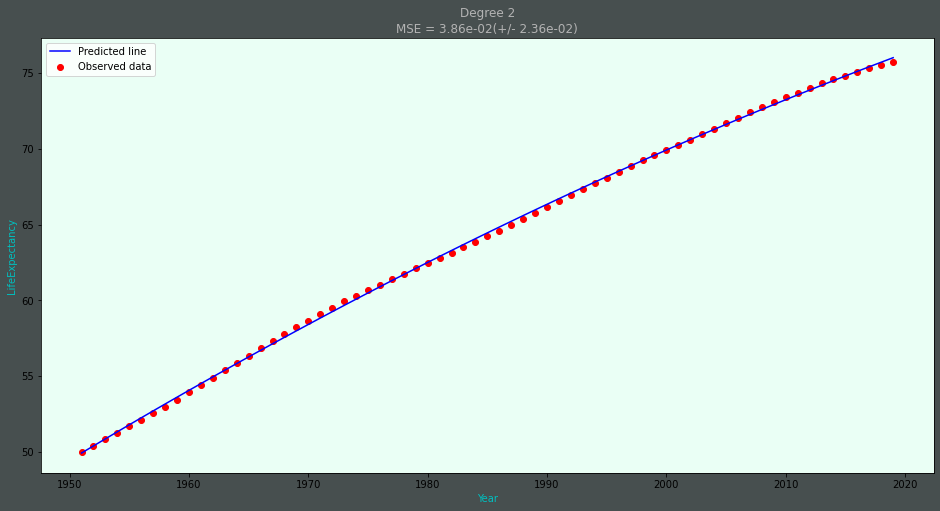

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
from sklearn.model_selection import cross_val_score
poly_features = PolynomialFeatures(degree=2)
# X_poly = poly_features.fit_transform(np.array(X).reshape(-1,1))
X_poly = poly_features.fit_transform(X)
 
pol_reg = LinearRegression()

pipeline = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", pol_reg)])

pol_reg.fit(X_poly, y)

scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)

# Visualizing the Polymonial Regression results
fig, ax = plt.subplots(figsize=(16,8),facecolor=(.28, .31, .31))
ax.set_facecolor('#eafff5')
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_features.fit_transform(X)), color='blue')
plt.legend(['Predicted line', 'Observed data'])
plt.title('Polynomial-regression', color='0.7')
plt.xlabel('Year', color='c')
plt.ylabel('LifeExpectancy', color='c')
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        poly_features.degree, -scores.mean(), scores.std()))
plt.show()

In [185]:
predict_future = pol_reg.predict(poly_features.fit_transform([[1955]]))
predict_future

array([[51.75502641]])

In [186]:
df[df['year']==1955]

,date,Life Expectancy from Birth (Years),Annual % Change,year
5,1955-12-31,51.67800,0.83000,1955


In [195]:
scores.std()

0.023632719703504043

In [197]:
-scores.mean()

0.038602728388415754